In [25]:
#Online News Popularity
#Done by Deepank G - Global Data Science Intern, Ureka Education Group  

#Importing required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import collections as c
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the dataset
data = pd.read_csv("OnlineNewsPopularity.csv")
print("No. of columns in the dataset: ",data.shape[1])
print("No. of rows in the dataset: ",data.shape[0])

No. of columns in the dataset:  38
No. of rows in the dataset:  39644


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 38 columns):
url                               39644 non-null object
 n_tokens_title                   39644 non-null int64
 n_tokens_content                 39644 non-null int64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null int64
 num_self_hrefs                   39644 non-null int64
 num_imgs                         39644 non-null int64
 num_videos                       39644 non-null int64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null int64
 data_channel_is_lifestyle        39644 non-null int64
 data_channel_is_entertainment    39644 non-null int64
 data_channel_is_bus              39644 non-null int64
 data_channel_is_socmed           39644 non-null int64
 d

In [4]:
data.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.040005,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.050096,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.118750,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.033351,0.033334,0.682188,0.323333,0.056872,0.009479,0.495833,-0.466667,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.494651,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.028575,0.028572,0.885427,0.281003,0.074627,0.012127,0.411127,-0.220192,0.136364,505


In [5]:
#Finding the percentage of missing values in each column
data_na = (data.isnull().sum()*100)/len(data)
print("% of missing data in each feature:")
data_na.sort_values(ascending=False)

% of missing data in each feature:


 shares                           0.0
 num_videos                       0.0
 data_channel_is_tech             0.0
 data_channel_is_socmed           0.0
 data_channel_is_bus              0.0
 data_channel_is_entertainment    0.0
 data_channel_is_lifestyle        0.0
 num_keywords                     0.0
 average_token_length             0.0
 num_imgs                         0.0
 title_sentiment_polarity         0.0
 num_self_hrefs                   0.0
 num_hrefs                        0.0
 n_non_stop_unique_tokens         0.0
 n_non_stop_words                 0.0
 n_unique_tokens                  0.0
 n_tokens_content                 0.0
 n_tokens_title                   0.0
 data_channel_is_world            0.0
 weekday_is_monday                0.0
 weekday_is_tuesday               0.0
 weekday_is_wednesday             0.0
 avg_negative_polarity            0.0
 avg_positive_polarity            0.0
 global_rate_negative_words       0.0
 global_rate_positive_words       0.0
 global_sent

In [6]:
#Dropping 'url' as its a metadata
data.drop(["url"], axis = 1, inplace = True)

#Stripping spaces from column title
data.columns = data.columns.str.lstrip()

In [7]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.216321,0.223770,0.234029,0.119309,0.039625,0.016612,0.353825,-0.259524,0.071425,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.282145,0.295191,0.289183,0.096931,0.017429,0.010828,0.104542,0.127726,0.265450,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.028571,0.028571,0.028574,0.057757,0.028384,0.009615,0.306244,-0.328383,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.040004,0.040001,0.040727,0.119117,0.039023,0.015337,0.358755,-0.253333,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.334218,0.375763,0.399986,0.177832,0.050279,0.021739,0.411428,-0.186905,0.150000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,0.919999,0.926534,0.927191,0.727841,0.155488,0.184932,1.000000,0.000000,1.000000,843300.000000


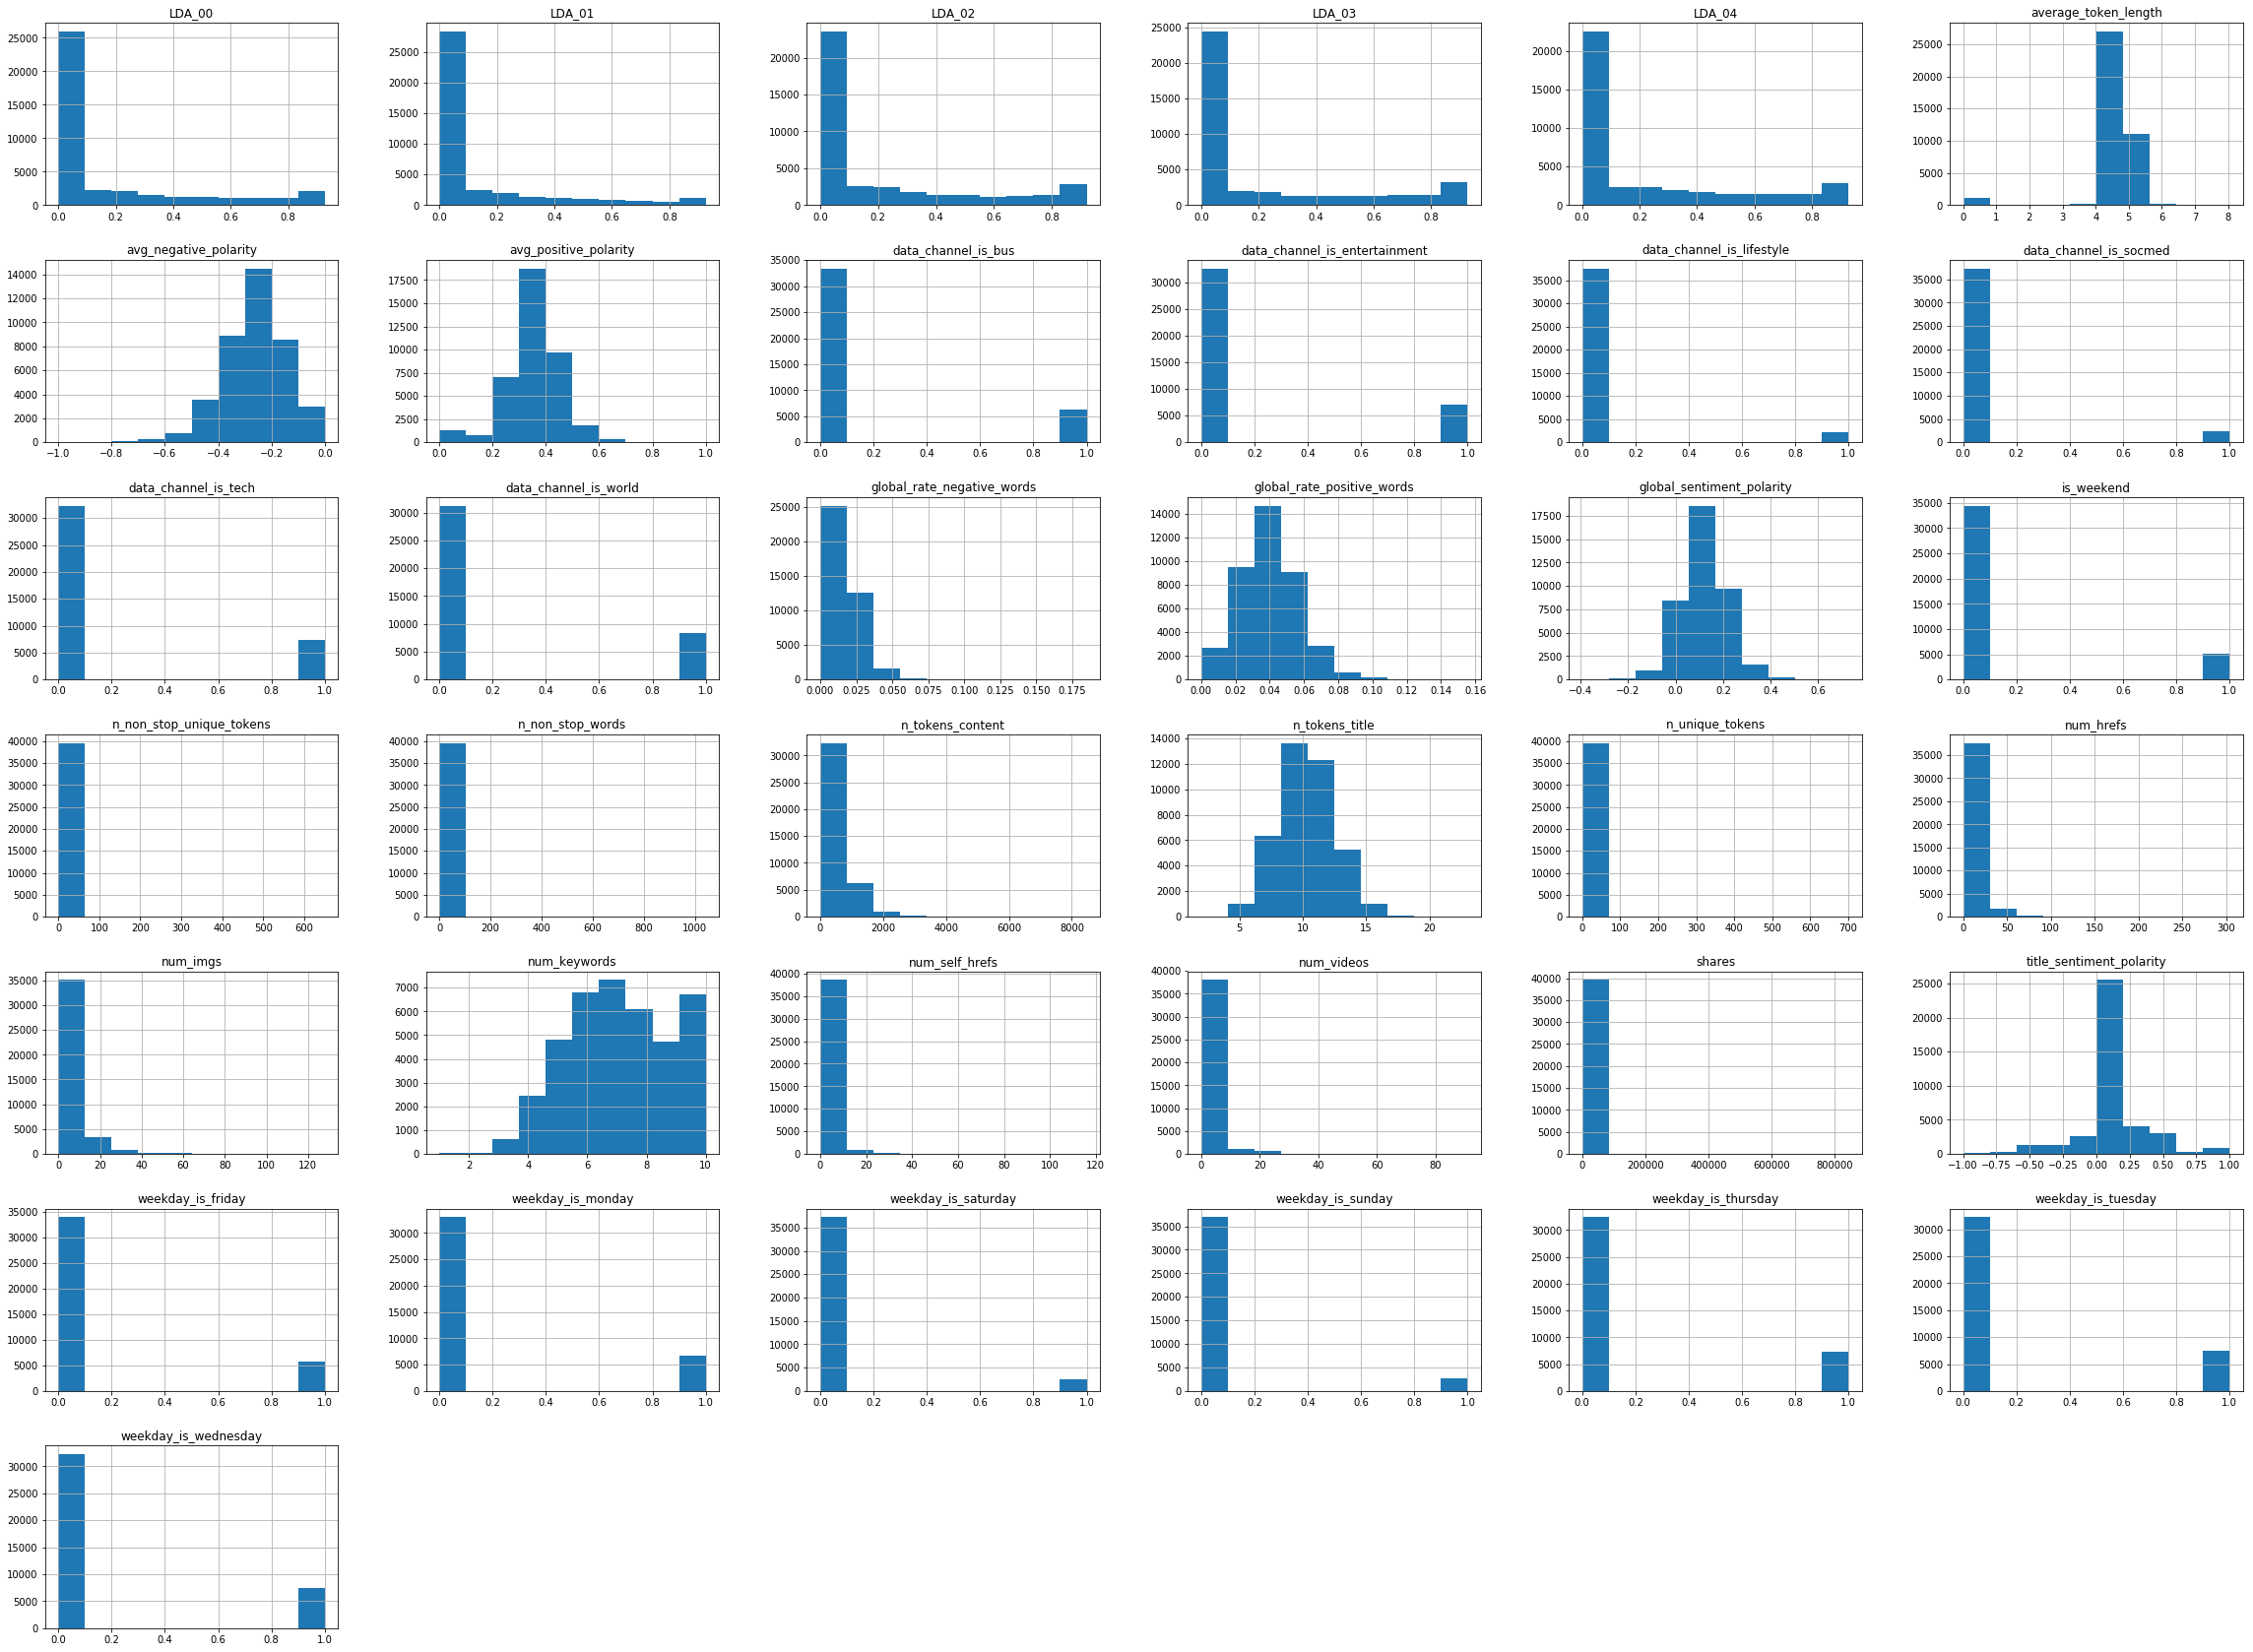

In [8]:
data.hist(figsize=(40, 30));

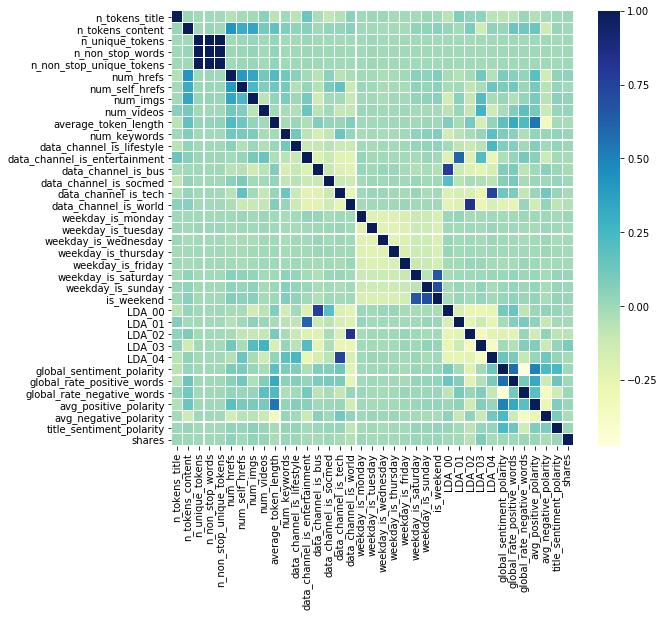

In [9]:
#Correlation Matrix
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.savefig('capture1.jpg')

In [10]:
corrmat['shares'].sort_values(ascending=False)

shares                           1.000000
LDA_03                           0.083771
num_hrefs                        0.045404
num_imgs                         0.039388
num_videos                       0.023936
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
weekday_is_monday                0.009726
n_tokens_title                   0.008783
weekday_is_sunday                0.008230
global_rate_negative_words       0.006615
data_channel_is_lifestyle        0.005831
data_channel_is_socmed           0.005021
global_sentiment_polarity        0.004163
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
global_rate_positive_words       0.000543
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_self_hrefs                  -0.001900
LDA_00                          -0

In [11]:
#Function to remove outliers
def Remove_Outlier_Indices(data):
    Q1 = data['shares'].quantile(0.25)
    Q3 = data['shares'].quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((data['shares']<(Q1-1.5*IQR))|(data['shares']>(Q3+1.5*IQR)))
    return trueList

In [12]:
#Indices with outlier data dropped across the whole data
drop = Remove_Outlier_Indices(data)
data = data[drop]
data.reset_index(drop=True, inplace=True)

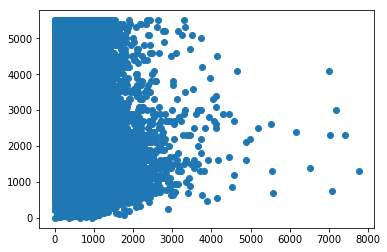

In [13]:
#Plot of no of words in content vs number of shares
plt.scatter(data['n_tokens_content'],data['shares'])
plt.savefig('capture2.jpg')
plt.show()

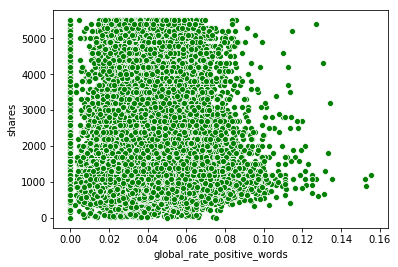

In [14]:
#Plot of rate of positive words in content vs number of shares
sns.scatterplot(x=data['global_rate_positive_words'],y=data['shares'], color='g')
plt.savefig('capture3.jpg')

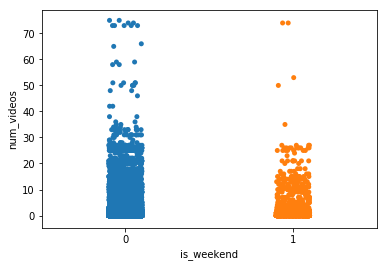

In [15]:
#Usage of videos in news published over the weekend
sns.stripplot(x=data['is_weekend'],y=data['num_videos'])
plt.savefig('capture4.jpg')

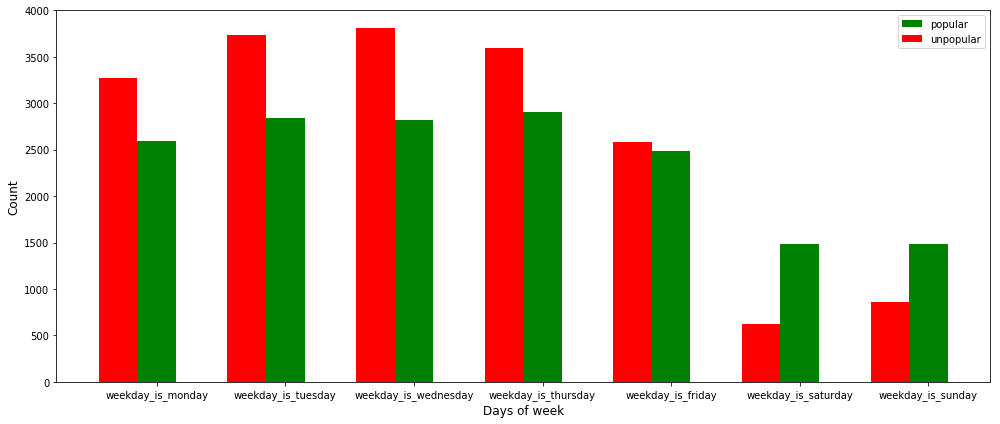

In [16]:
#Number of popular and unpopular news published on each day of the week
columns_day = data.columns.values[17:24]
unpop = data[data['shares']<=1300]
pop = data[data['shares']>1300]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

fig = plt.figure(figsize = (14,6))
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'g', label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'r', label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig('capture5.jpg')
plt.show()

In [17]:
#Pie chart of data channels used for the news
sizes = []
news_tag = data.columns.values[11:17]
for i in news_tag:
    sizes.append(data[i][data[i]==1].sum())

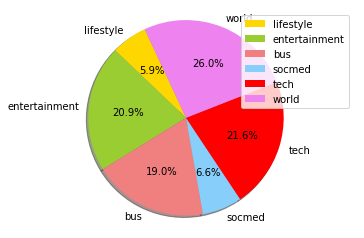

In [18]:
labels = 'lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'violet']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=115)
plt.axis('equal')
plt.legend(labels = labels, loc = 'upper right')
plt.savefig('capture6.jpg')
plt.show()

In [19]:
#Counting the total number of news published on each day of the week
days=[]
for i in columns_day:
    for j in range(len(data[i])):
        if data[i][j]==1:
            days.append(i)

Counter({'weekday_is_monday': 5864,
         'weekday_is_tuesday': 6576,
         'weekday_is_wednesday': 6637,
         'weekday_is_thursday': 6501,
         'weekday_is_friday': 5076,
         'weekday_is_saturday': 2113,
         'weekday_is_sunday': 2336})

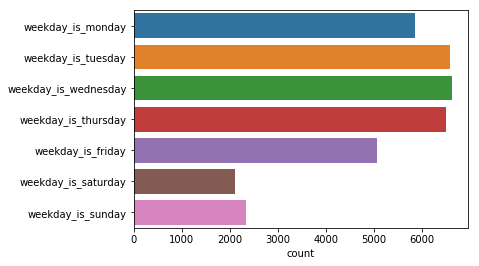

In [20]:
sns.countplot(y = days)
plt.savefig('capture7.jpg')
c.Counter(days)

In [78]:
#Performing regression: predicting number of shares
X = data.iloc[:,:-1]
Y = data['shares']

scaler = preprocessing.MinMaxScaler()
x_scaler = scaler.fit_transform(X)
Xnorm = pd.DataFrame(x_scaler)

X_train, X_test, y_train, y_test = train_test_split(Xnorm, Y, test_size = 0.20, random_state = 42)

In [79]:
regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
#Comparing actual shares vs predicted shares
sX = X_train.iloc[:400]
sy = y_train.iloc[:400]

df_someXdata = pd.DataFrame(regr.predict(sX),list(sy) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,1500,1585.25
1,1300,1176.75
2,930,1516.50
3,1200,1583.25
4,1900,1727.25


In [81]:
#Finding accuracy and rmse for the predictions
print(regr.score(X_test, y_test), '= Accuracy')
predictions = regr.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse, '= RMSE')

0.09058093051625682 = Accuracy
1057.198055495161 = RMSE
